<h3 align='center'> Time Series Using Statsmodels </h3>

<h4> Statsmodel libraries can be used for time series forecasting. </h4>

Statsmodels is the Python modeule that provides classes and functions for the estimation of many different statistical models, as well as for conducting statistical tests and statistical data exploration 

In this whole section, we will go through:

   - Introduction to Statsmodels 
   - ETS Decomposition 
   - Moving Averages 
   - <h5> Holt WInter Methods </h5>
   - Statsmodels Time Series Exercises

<h4> 4. Holt Winter Methods </h4>

In previous section, we did EWMA and SMA which actually uses one smoothing factor $\alpha$ but fails to account for other contributing factors like trend and seasonality.

Here we will focus on fitting Holt-WInters model to time series data

<b> Holt Winter seasonal method - forecast equation + 3 smoothing equations</b>

 - Level ($l_t$) - $\alpha$
 - trend ($b_t$) - $\beta$
 - Seasonal ($s_t$) - $\gamma$
 
<b>2 Variations: </b>
 - seasonal variations constant through series (additive method)
 - seasonal variations changing proportional to level of series (multiplicative method)

HW method allow to add on dowuble and triple exponential smoothing.

<b> Single Exponential Smoothing ($\alpha$)</b>

$\begin{split}y_0 &= x_0 \\
y_t &= (1 - \alpha) y_{t-1} + \alpha x_t\end{split}$ 

<b> Double Exponential Smoothing (Holt's Method - $\alpha + \beta$)</b>

\begin{split}l_t &= (1 - \alpha) l_{t-1} + \alpha x_t, & \text{    level}\\
b_t &= (1-\beta)b_{t-1} + \beta(l_t-l_{t-1}) & \text{    trend}\\
y_t &= l_t + b_t & \text{    fitted model}\\
\hat y_{t+h} &= l_t + hb_t & \text{    forecasting model (} h = \text{# periods into the future)}\end{split}

Because we haven't yet considered seasonal fluctuations, the forecasting model is simply a straight sloped line extending from the most recent data point. We'll see an example of this in upcoming lectures.

With <strong>Triple Exponential Smoothing</strong> (aka the Holt-Winters Method) we introduce a smoothing factor $\gamma$ (gamma) that addresses seasonality:

\begin{split}l_t &= (1 - \alpha) l_{t-1} + \alpha x_t, & \text{    level}\\
b_t &= (1-\beta)b_{t-1} + \beta(l_t-l_{t-1}) & \text{    trend}\\
c_t &= (1-\gamma)c_{t-L} + \gamma(x_t-l_{t-1}-b_{t-1}) & \text{    seasonal}\\
y_t &= (l_t + b_t) c_t & \text{    fitted model}\\
\hat y_{t+m} &= (l_t + mb_t)c_{t-L+1+(m-1)modL} & \text{    forecasting model (} m = \text{# periods into the future)}\end{split}

Here $L$ represents the number of divisions per cycle. In our case looking at monthly data that displays a repeating pattern each year, we would use $L=12$.

In general, higher values for $\alpha$, $\beta$ and $\gamma$ (values closer to 1), place more emphasis on recent data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('airline_passengers.csv',index_col='Month',parse_dates=True)
df = df.dropna()
df.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [3]:
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In general pandas doesn't give frequency of the data as seen above also (None). BUt we need to tell statsmodels that there is a frequency in the data.

<a href='http://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases'>Offset aliases link</a>

In [4]:
df.index.freq = 'MS' #from list of offset aliases - MS - month start frequency

In [5]:
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq='MS')

<b> Single Exponential Smoothing ($\alpha$)</b>

In [6]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

span = 12
alpha = 2/(span+1)

df['EWMA12']=df['Thousands of Passengers'].ewm(alpha=alpha,adjust=False).mean()
df.head()

,Thousands of Passengers,EWMA12
Month,,
1949-01-01,112,112.000000
1949-02-01,118,112.923077
1949-03-01,132,115.857988
1949-04-01,129,117.879836
1949-05-01,121,118.359861


In [7]:
# Simple Exp smoothing for EWMA12

model = SimpleExpSmoothing(df['Thousands of Passengers'])
fitted_model=model.fit(smoothing_level=alpha,optimized=False)

2020-11-15 23:34:51,331 [1056] WARNING  py.warnings:109: [JupyterRequire] c:\users\home\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(



In [8]:
fitted_model.fittedvalues #first two values repeated and others shifted by 1

Month
1949-01-01    112.000000
1949-02-01    112.000000
1949-03-01    112.923077
1949-04-01    115.857988
1949-05-01    117.879836
                 ...    
1960-08-01    474.698368
1960-09-01    494.898619
1960-10-01    496.914216
1960-11-01    491.388952
1960-12-01    475.790652
Freq: MS, Length: 144, dtype: float64

In [9]:
fitted_model.fittedvalues.shift(-1)

Month
1949-01-01    112.000000
1949-02-01    112.923077
1949-03-01    115.857988
1949-04-01    117.879836
1949-05-01    118.359861
                 ...    
1960-08-01    494.898619
1960-09-01    496.914216
1960-10-01    491.388952
1960-11-01    475.790652
1960-12-01           NaN
Freq: MS, Length: 144, dtype: float64

In [10]:
df['SES12']=fitted_model.fittedvalues.shift(-1)
df.head()

,Thousands of Passengers,EWMA12,SES12
Month,,,
1949-01-01,112,112.000000,112.000000
1949-02-01,118,112.923077,112.923077
1949-03-01,132,115.857988,115.857988
1949-04-01,129,117.879836,117.879836
1949-05-01,121,118.359861,118.359861


<b> Double Exponential Smoothing (Holt's Method - $\alpha + \beta$)</b>

<AxesSubplot:xlabel='Month'>

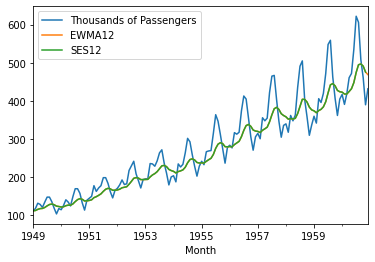

In [11]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
df.plot()

In [12]:
df['DES_add_12']=ExponentialSmoothing(df['Thousands of Passengers'],trend='add').fit().fittedvalues.shift(-1)
df.head()

2020-11-15 23:35:00,863 [1056] WARNING  py.warnings:109: [JupyterRequire] c:\users\home\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(



,Thousands of Passengers,EWMA12,SES12,DES_add_12
Month,,,,
1949-01-01,112,112.000000,112.000000,113.474828
1949-02-01,118,112.923077,112.923077,119.464366
1949-03-01,132,115.857988,115.857988,133.477561
1949-04-01,129,117.879836,117.879836,130.543312
1949-05-01,121,118.359861,118.359861,122.528126


In [13]:
df.columns

Index(['Thousands of Passengers', 'EWMA12', 'SES12', 'DES_add_12'], dtype='object')

<AxesSubplot:xlabel='Month'>

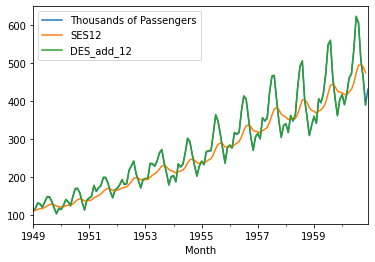

In [14]:
df[['Thousands of Passengers', 'SES12', 'DES_add_12']].plot()

<AxesSubplot:xlabel='Month'>

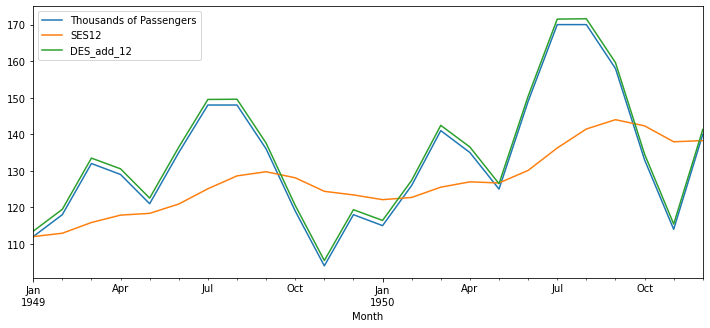

In [15]:
df[['Thousands of Passengers', 'SES12', 'DES_add_12']].iloc[:24].plot(figsize=(12,5)) #first three years

<AxesSubplot:xlabel='Month'>

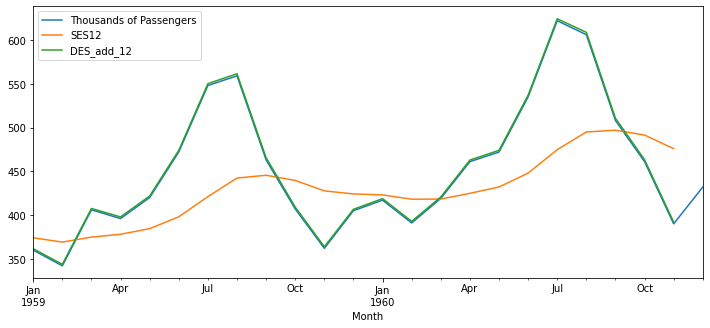

In [16]:
df[['Thousands of Passengers', 'SES12', 'DES_add_12']].iloc[-24:].plot(figsize=(12,5)) #last three years

In [17]:
# now using multiplicative method

df['DES_mul_12']=ExponentialSmoothing(df['Thousands of Passengers'],trend='mul').fit().fittedvalues.shift(-1)
df.head()

2020-11-15 23:35:11,264 [1056] WARNING  py.warnings:109: [JupyterRequire] c:\users\home\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(



,Thousands of Passengers,EWMA12,SES12,DES_add_12,DES_mul_12
Month,,,,,
1949-01-01,112,112.000000,112.000000,113.474828,114.978251
1949-02-01,118,112.923077,112.923077,119.464366,121.191659
1949-03-01,132,115.857988,115.857988,133.477561,135.802180
1949-04-01,129,117.879836,117.879836,130.543312,132.657709
1949-05-01,121,118.359861,118.359861,122.528126,124.213566


<AxesSubplot:xlabel='Month'>

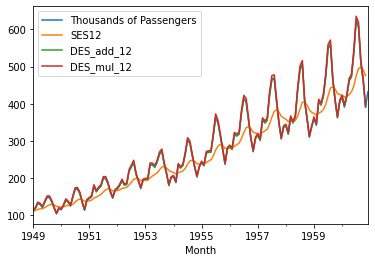

In [18]:
df[['Thousands of Passengers', 'SES12', 'DES_add_12','DES_mul_12']].plot()

<AxesSubplot:xlabel='Month'>

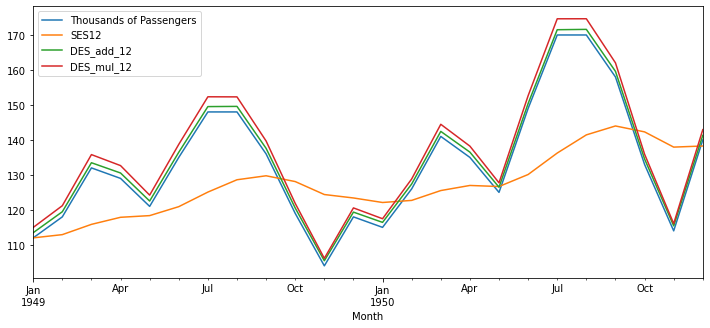

In [19]:
df[['Thousands of Passengers', 'SES12', 'DES_add_12','DES_mul_12']].iloc[:24].plot(figsize=(12,5)) #first three years

<AxesSubplot:xlabel='Month'>

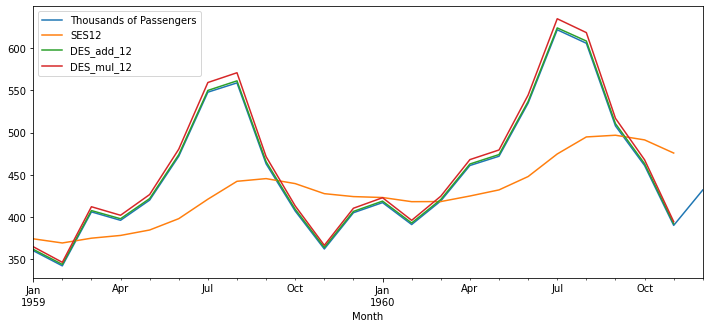

In [20]:
df[['Thousands of Passengers', 'SES12', 'DES_add_12','DES_mul_12']].iloc[-24:].plot(figsize=(12,5)) #last three years

<strong>Triple Exponential Smoothing</strong> 

<AxesSubplot:xlabel='Month'>

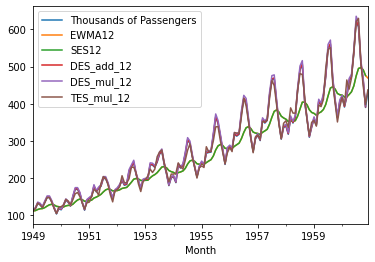

In [22]:
df['TES_mul_12'] = ExponentialSmoothing(df['Thousands of Passengers'],trend='mul',seasonal='mul',seasonal_periods=12).fit().fittedvalues

df.plot()

In [23]:
df.columns

Index(['Thousands of Passengers', 'EWMA12', 'SES12', 'DES_add_12',
       'DES_mul_12', 'TES_mul_12'],
      dtype='object')

<AxesSubplot:xlabel='Month'>

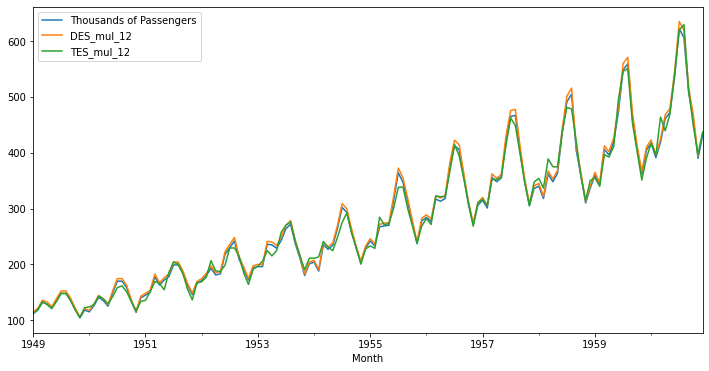

In [24]:
df[['Thousands of Passengers','DES_mul_12', 'TES_mul_12']].plot(figsize=(12,6))

<AxesSubplot:xlabel='Month'>

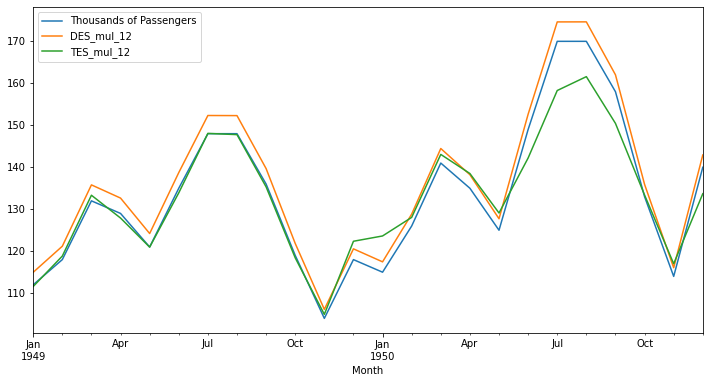

In [25]:
df[['Thousands of Passengers','DES_mul_12', 'TES_mul_12']].iloc[:24].plot(figsize=(12,6)) #TES looks like doing poor job

<AxesSubplot:xlabel='Month'>

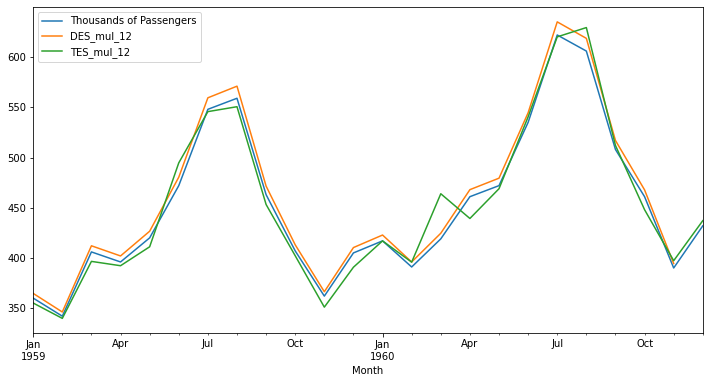

In [26]:
df[['Thousands of Passengers','DES_mul_12', 'TES_mul_12']].iloc[-24:].plot(figsize=(12,6))

2020-11-15 23:41:43,762 [1056] WARNING  py.warnings:109: [JupyterRequire] c:\users\home\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(



<AxesSubplot:xlabel='Month'>

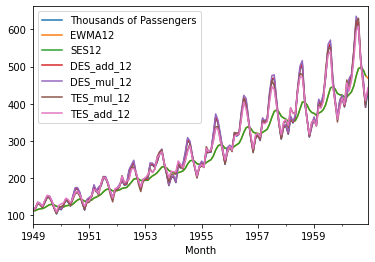

In [27]:
df['TES_add_12'] = ExponentialSmoothing(df['Thousands of Passengers'],trend='add',seasonal='add',seasonal_periods=12).fit().fittedvalues

df.plot()

In [28]:
df.columns

Index(['Thousands of Passengers', 'EWMA12', 'SES12', 'DES_add_12',
       'DES_mul_12', 'TES_mul_12', 'TES_add_12'],
      dtype='object')

<AxesSubplot:xlabel='Month'>

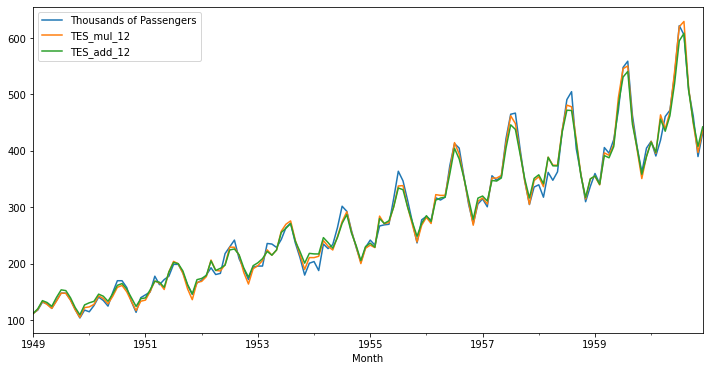

In [29]:
df[['Thousands of Passengers','TES_mul_12', 'TES_add_12']].plot(figsize=(12,6))

<AxesSubplot:xlabel='Month'>

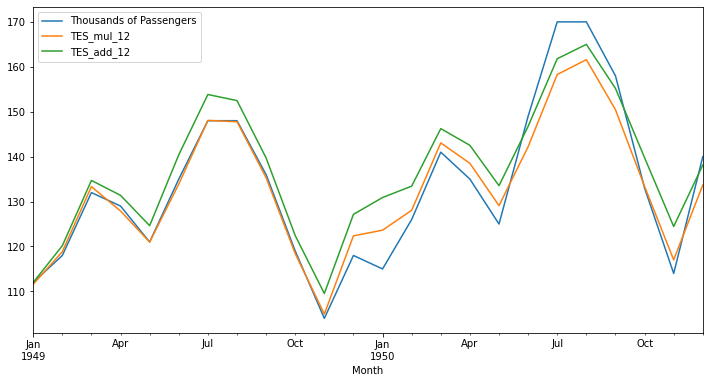

In [30]:
df[['Thousands of Passengers','TES_mul_12', 'TES_add_12']].iloc[:24].plot(figsize=(12,6))

<AxesSubplot:xlabel='Month'>

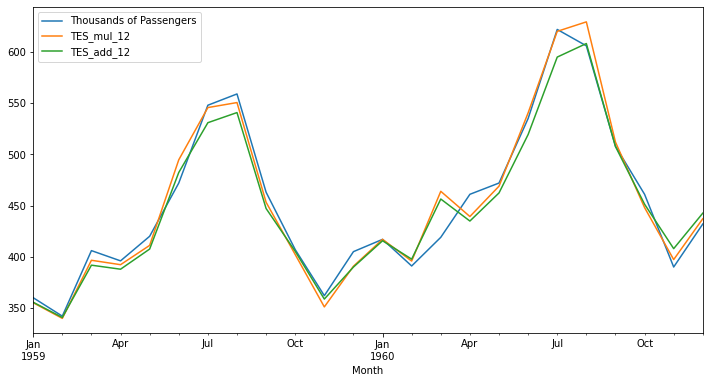

In [31]:
df[['Thousands of Passengers','TES_mul_12', 'TES_add_12']].iloc[-24:].plot(figsize=(12,6))